<a href="https://colab.research.google.com/github/Kianjputnam/NBAInjuryWork/blob/main/NBAdatapart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
injuries=pd.read_csv("injuries_2010-2020.csv")

In [7]:
injuries.to_pickle('injuries.pkl')
injuries['Notes'] = injuries['Notes'].str.lower()


In [8]:
injuries['body_part'] = None
injuries['Team'] = injuries['Team']

In [9]:
import re

def assign_injury_code(injury_list, code, injuries):
    # Initialize/rebuild list of rows where there is no injury
    injury_assigned_idx = injuries['body_part'].notna()

    # Find rows with injury in injury list
    idx = injuries['Notes'].str.contains(injury_list, case=False, regex=True)

    # Remove rows that were already assigned an injury code
    trimmed_list = idx & ~injury_assigned_idx

    # Assign code to remaining list
    injuries.loc[trimmed_list, 'body_part'] = code
    return injuries

# Classify each injury by body part
injuries = assign_injury_code("metatarsal|toe|surgery to repair ligament and bone", "toe", injuries)
injuries = assign_injury_code("foot|heel|plantar", "foot", injuries)
injuries = assign_injury_code("knee|patella", "knee", injuries)
injuries = assign_injury_code("ankle", "ankle", injuries)
injuries = assign_injury_code("achilles|acchilles", "achilles", injuries)
injuries = assign_injury_code("leg|hamstring|calf|thigh|quad|thigh|shin|fibula|tibia|tailbone", "leg", injuries)
injuries = assign_injury_code("groin", "groin", injuries)
injuries = assign_injury_code("hip|abductor|adductor|si|hernia|pelvis", "hip", injuries)
injuries = assign_injury_code("hand|wrist", "hand", injuries)
injuries = assign_injury_code("finger|metacarpal|thumb", "finger", injuries)
injuries = assign_injury_code("back|spinal|nerve root irritation", "back", injuries)
injuries = assign_injury_code("shoulder|rotator", "shoulder", injuries)
injuries = assign_injury_code("arm|elbow|triceps|biceps|bicep|tricep", "arm", injuries)
injuries = assign_injury_code("upper body|ribs|pectoral|chest|rib|pectoracl|sternum|lat|sc|clavicle|abdominal|abdomen|oblique|core", "torso", injuries)
injuries = assign_injury_code("neck|cervical", "neck", injuries)
injuries = assign_injury_code("head|concussion", "head", injuries)
injuries = assign_injury_code("face|cheekbone|nose|facial|orbital|mouth|jaw|oral|dental|cheek|tooth|eye|cornia", "face", injuries)
injuries = assign_injury_code("rest", "rest", injuries)
injuries = assign_injury_code("illness|flu|stomach virus|gastro|upset stomach|food poisoning|infection|bronchitis|cold|allergic reaction|strep|stomach ailment|virus|upper respiratory inflammation|chicken pox|vertigo|respiratory ailment|pneumonia|blood clots|dizziness|gasroenteritis|embolism|ill (dnp)|dermatitis|thrombocytopenia", "illness", injuries)


<ipython-input-9-dbc1ca4196b3>:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  idx = injuries['Notes'].str.contains(injury_list, case=False, regex=True)


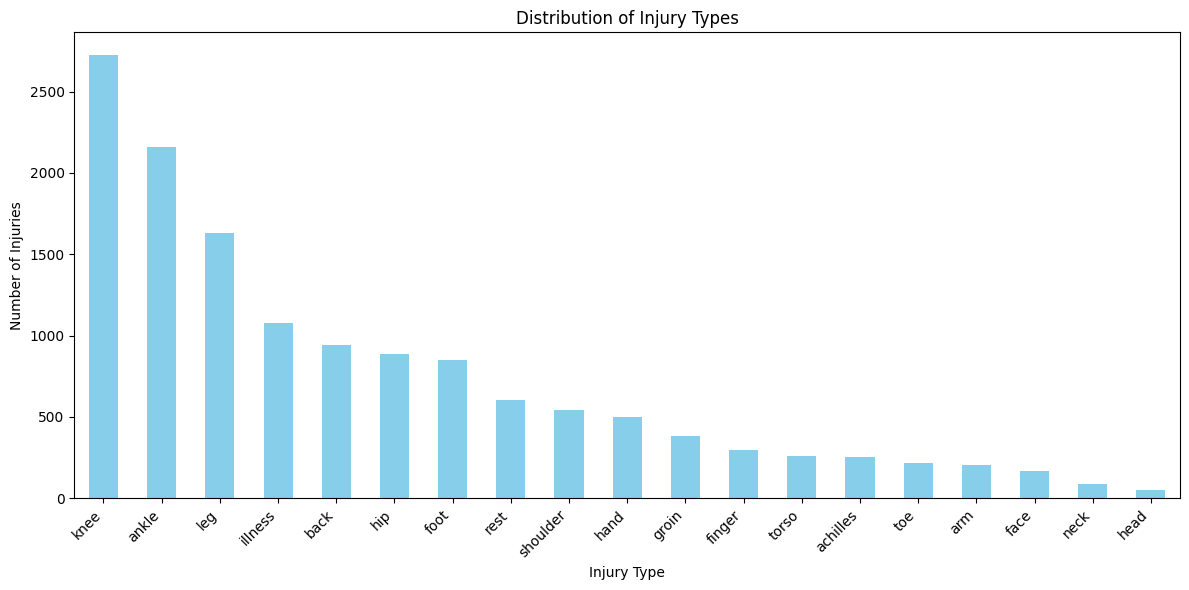

In [10]:
import matplotlib.pyplot as plt

# Assuming 'injuries' DataFrame has been updated with the body_part codes

# Count the occurrences of each injury type
injury_counts = injuries['body_part'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
injury_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Injury Types')
plt.xlabel('Injury Type')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [12]:
print(injuries['body_part'].value_counts())

knee        2728
ankle       2158
leg         1629
illness     1075
back         943
hip          890
foot         850
rest         602
shoulder     544
hand         497
groin        380
finger       298
torso        260
achilles     253
toe          217
arm          205
face         167
neck          86
head          51
Name: body_part, dtype: int64
